## Context
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes:
- the number of pregnancies the patient has had, 
- their BMI, 
- insulin level, 
- age, and 
- so on.

## About this file
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. --> Supervise

# Import Module

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [6]:
diabetes = pd.read_csv('diabetes.csv')
print(f'diabetes columns : {diabetes.columns}')
diabetes.head()

diabetes columns : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(f'Dataset shape : {diabetes.shape}')
diabetes.info()

Dataset shape : (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Explanatory Data Analysis

### Independent Feature Distribution

<AxesSubplot:xlabel='Age', ylabel='Count'>

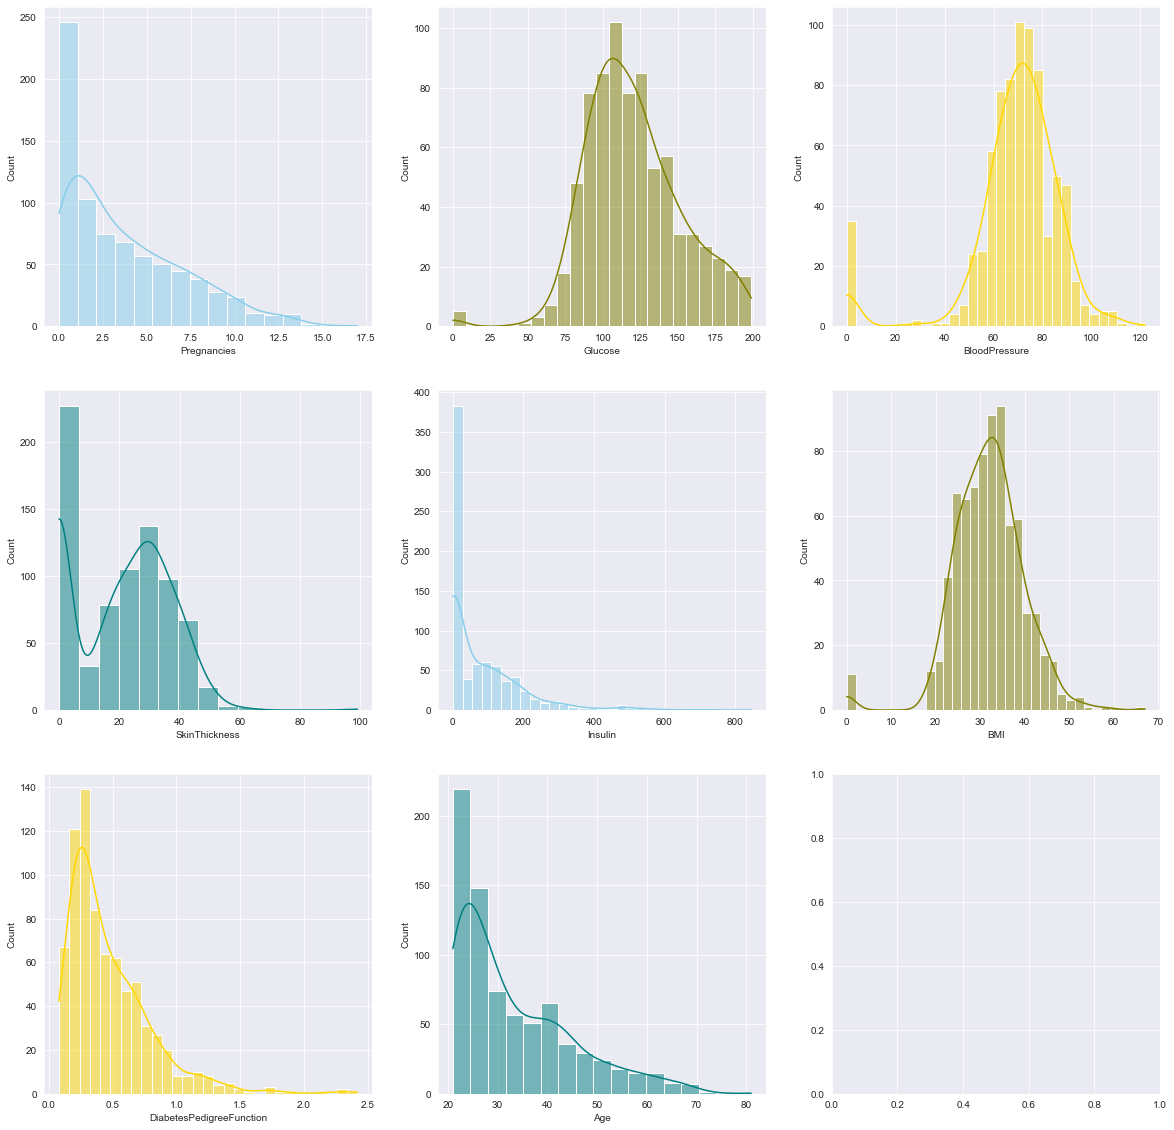

In [24]:
# check the distribution of each feature
# df.hist(figsize=(20,20))
# fig, axs = plt.subplots(3,3, figsize=(20,20))
# sns.histplot(data=diabetes, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
# sns.histplot(data=diabetes, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
# sns.histplot(data=diabetes, x="BloodPressure", kde=True, color="gold", ax=axs[0, 2])
# sns.histplot(data=diabetes, x="SkinThickness", kde=True, color="teal", ax=axs[1, 0])
# sns.histplot(data=diabetes, x="Insulin", kde=True, color="skyblue", ax=axs[1, 1])
# sns.histplot(data=diabetes, x="BMI", kde=True, color="olive", ax=axs[1, 2])
# sns.histplot(data=diabetes, x="DiabetesPedigreeFunction", kde=True, color="gold", ax=axs[2, 0])
# sns.histplot(data=diabetes, x="Age", kde=True, color="teal", ax=axs[2, 1])

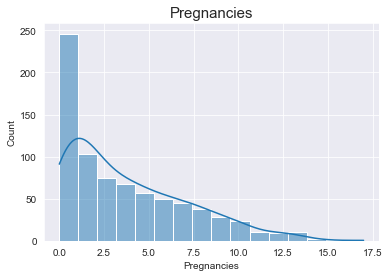

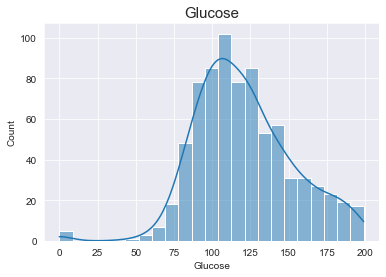

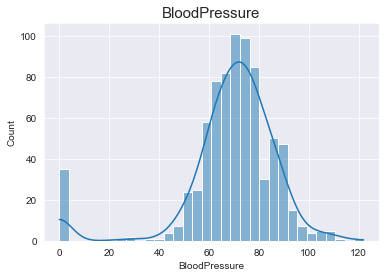

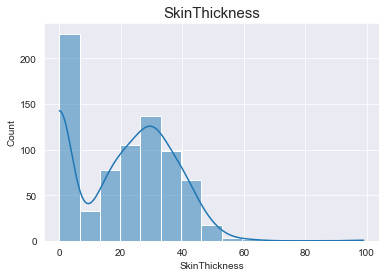

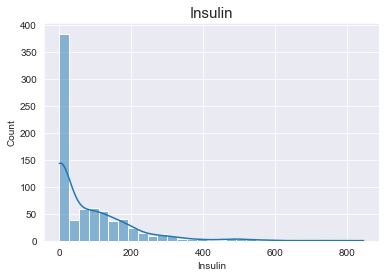

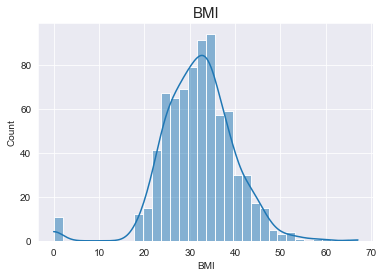

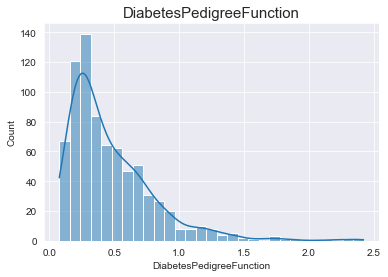

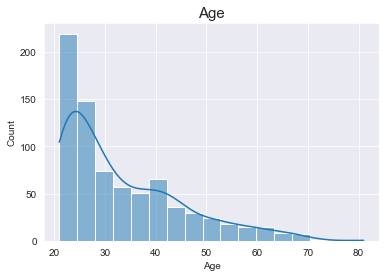

In [9]:
df_num = diabetes.drop(columns='Outcome', axis=1)
for i in df_num.columns:
    sns.histplot(data=df_num, x=i, kde=True)
    plt.title(i, size=15)
    plt.show()

### Outcome

Text(0.5, 1.0, 'Outcome')

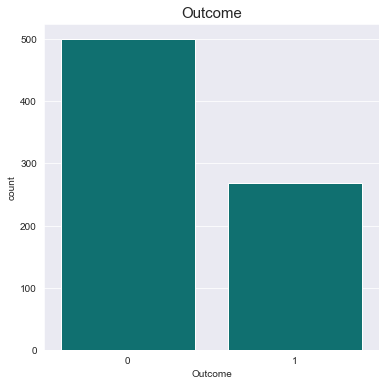

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=diabetes, x="Outcome", color="teal")
plt.title('Outcome', size=15)

<AxesSubplot:ylabel='Outcome'>

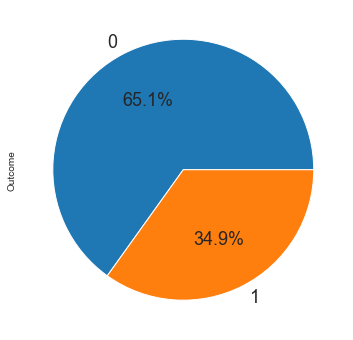

In [11]:
# show proportional data of outcome/target
plt.figure(figsize=(6,6))
diabetes['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 18}, shadow=False)

most of the independent feature have normal or exponential distribution, and the target/label is dominate by non-diabetes by at least 65%

There are too many 0 values in BloodPressure, SkinThickness, Insulin and BMI. Assuming they are missng data, we will deal with that later

In [12]:
preg_count = diabetes['Pregnancies'].unique()
print(sorted(preg_count))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]


In [38]:
# diabetes patient according to pregnancies
diabetes.groupby('Pregnancies')['Outcome'].agg(pd.Series.mode)

Pregnancies
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          1
8          1
9          1
10         0
11         1
12         0
13    [0, 1]
14         1
15         1
17         1
Name: Outcome, dtype: object

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

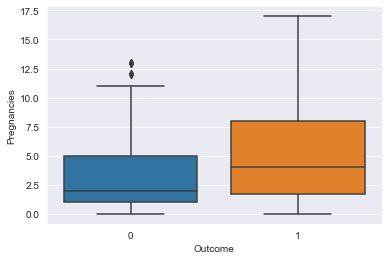

In [14]:
sns.boxplot(x='Outcome',  y='Pregnancies', data=diabetes)

most of the women who had been pregnant for 0-6 times are non-diabetic, and more than 6 times pregnant are mostly diabetic

In [15]:
# Continuous feature distribution
diabetes.pivot_table(index='Outcome', values=['DiabetesPedigreeFunction','BMI'])

,BMI,DiabetesPedigreeFunction
Outcome,,
0,30.304200,0.429734
1,35.142537,0.550500


<AxesSubplot:>

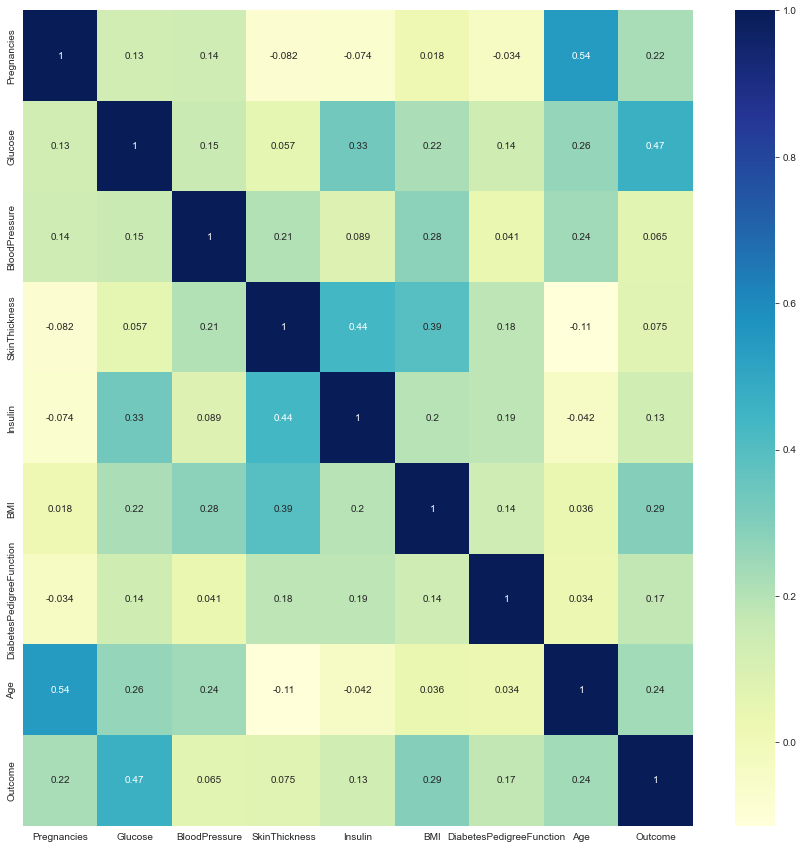

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes.corr(), annot=True, cmap='YlGnBu')

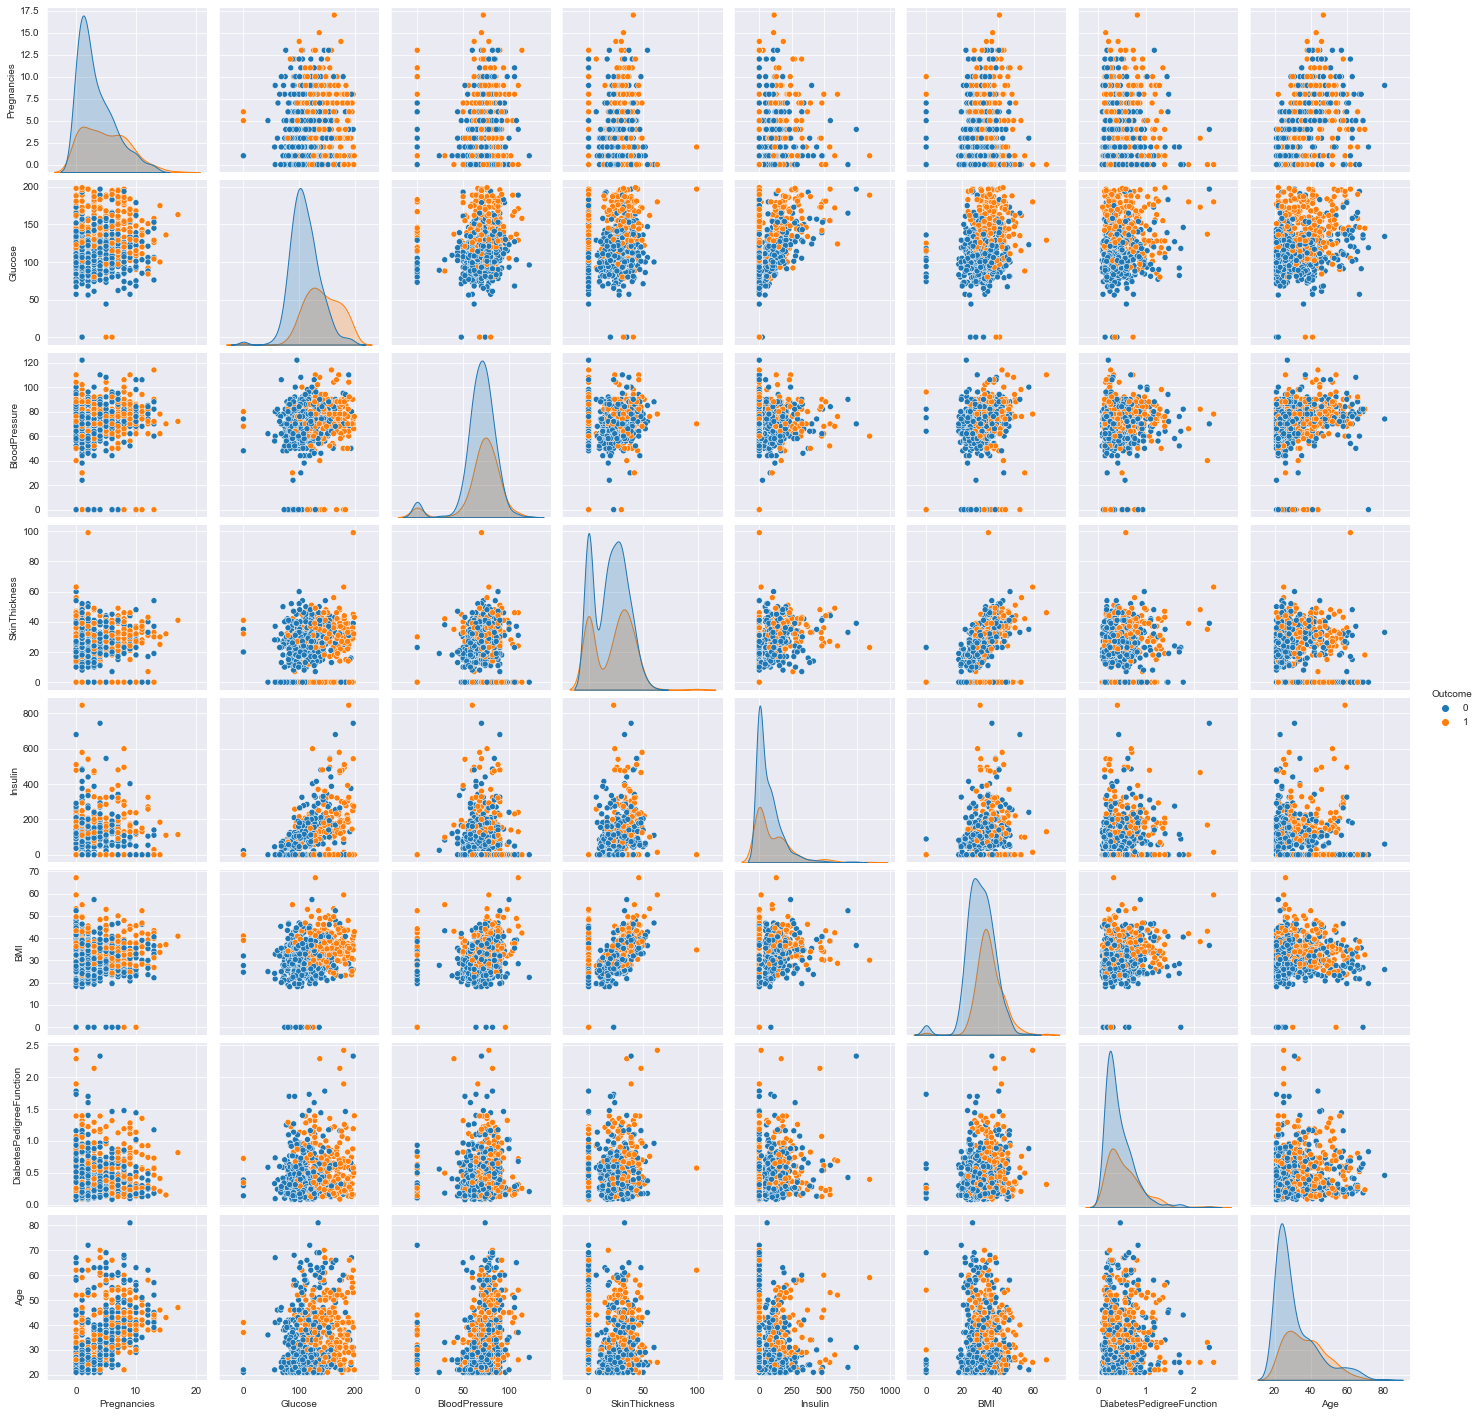

In [54]:
sns.pairplot(diabetes, hue='Outcome')

## Data Cleaning

In [56]:
# identify missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
# Check how many missing (0 value) data in each independent feature
zero_cols = diabetes.drop(columns=['Pregnancies','Outcome'], axis=1)
for col in zero_cols.columns:
    print('Number of rows with missng/0 data in {}: {}'.format(col, len(diabetes.loc[diabetes[col] == 0])))
# print('Number of rows with missng/0 data in BloodPressure: {}'.format(len(diabetes.loc[diabetes['BloodPressure'] == 0])))
# print('Number of rows with missng/0 data in SkinThickness: {}'.format(len(diabetes.loc[diabetes['SkinThickness'] == 0])))
# print('Number of rows with missng/0 data in Insulin: {}'.format(len(diabetes.loc[diabetes['Insulin'] == 0])))
# print('Number of rows with missng/0 data in BMI: {}'.format(len(diabetes.loc[diabetes['BMI'] == 0])))

Number of rows with missng/0 data in Glucose: 5
Number of rows with missng/0 data in BloodPressure: 35
Number of rows with missng/0 data in SkinThickness: 227
Number of rows with missng/0 data in Insulin: 374
Number of rows with missng/0 data in BMI: 11
Number of rows with missng/0 data in DiabetesPedigreeFunction: 0
Number of rows with missng/0 data in Age: 0


In [59]:
from sklearn.impute import SimpleImputer

# change  0 values into mean value of selected feature
fill_missing_val = SimpleImputer(missing_values=0, strategy='mean')
missing_feature = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']
diabetes[missing_feature] = fill_missing_val.fit_transform(diabetes[missing_feature])

In [60]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


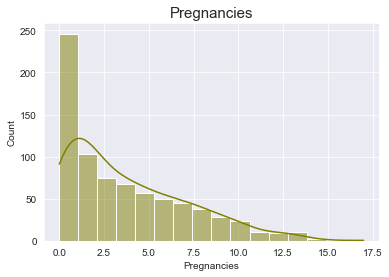

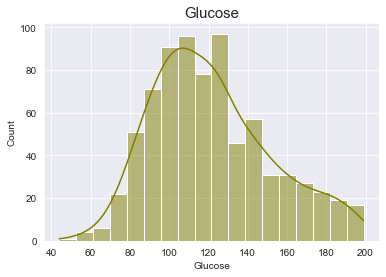

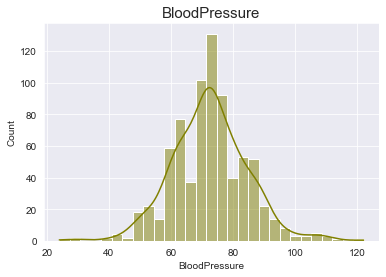

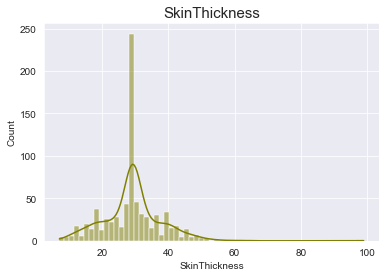

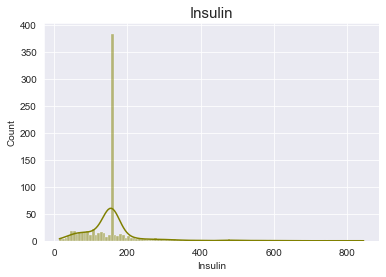

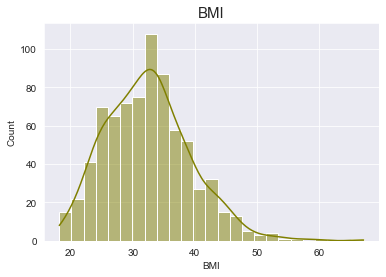

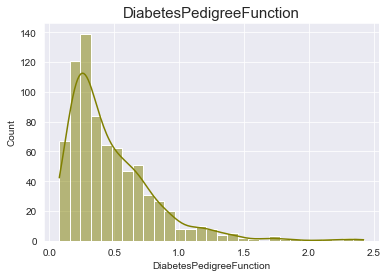

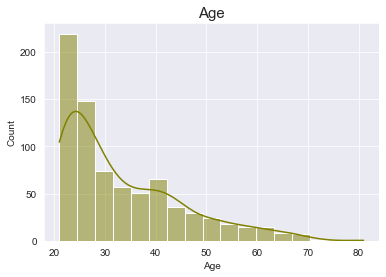

In [101]:
# feature distribution after impute missing data/0 values
df_num = diabetes.drop(columns='Outcome', axis=1)
for i in df_num.columns:
    sns.histplot(data=df_num, x=i, kde=True, color='olive')
    plt.title(i, size=15)
    plt.show()

# Modelling

In [63]:
# separate label/target from dataframe
x = diabetes.drop(columns='Outcome', axis=1)
y = diabetes['Outcome']

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f'x_train size: {x_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'x_test size: {x_test.shape}')
print(f'y_test size: {y_test.shape}')

x_train size: (537, 8)
y_train size: (537,)
x_test size: (231, 8)
y_test size: (231,)


In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [66]:
y_pred = forest.predict(x_test)

train_score = forest.score(x_train, y_train)
test_score = forest.score(x_test, y_test)
print(f'train accuracy: {round(train_score, 3)}')
print(f'test accuracy: {round(test_score, 3)}')

train accuracy: 1.0
test accuracy: 0.745


In [67]:
from sklearn.metrics import accuracy_score
x_score = accuracy_score(y_test, y_pred)
print(f'Accuracy before parameter tuning: {round(x_score, 3)}')

Accuracy before parameter tuning: 0.745


[[120  31]
 [ 28  52]]


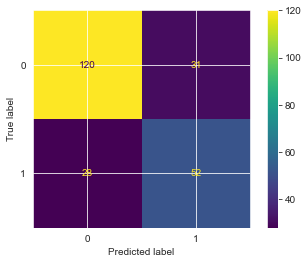

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
print(cm)
disp.plot()

In [29]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

